# Credit scoring for retail portfolio

## Content

- Data
    - Upload and visualize data
    - Plot some graphs and KPIs in time
    
    
- Fitting a model
    - Logistic regression
    - Generalized Additive Models (GAMs)
    - Decision tree
    - Gradient boosting
 
 
- Interpreting a model
    - Regression coefficients
    - Partial dependence plots
    - Rules from tree
    - Feature importance
    - SHAP values
 
 
- Validating a model
    - Precision, recall, F1
    - ROC and PR curve
    - Score distribution and optimal threshold
    - Probability calibration
    
    
- Financial impact
    - Profitability curve
    - Model risk and degradation


- Additional topics
    - AutoML
    - More interpretability
    
    
## References
- [Lending Club Data](https://www.kaggle.com/pavlofesenko/minimizing-risks-for-loan-investments)
- https://www.kaggle.com/faressayah/lending-club-loan-defaulters-prediction
- https://learn.datacamp.com/courses/credit-risk-modeling-in-python

In [1]:
import numpy as np
import pandas as pd

from datetime import datetime
import re

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("bmh")
plt.rcParams['font.family'] = 'DejaVu Sans'

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# Data

In [2]:
data_description = pd.read_excel('Downloads/lending_club_main_features.xlsx', usecols=['LoanStatNew', 'Description'])

data_description

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when ap...
7,emp_length,Employment length in years. Possible values ar...
8,home_ownership,The home ownership status provided by the borr...
9,annual_inc,The self-reported annual income provided by th...


Load data

In [3]:
X = pd.read_pickle('Downloads/lc_data_processed.pkl')

X['issue_d'] = pd.to_datetime(X['issue_d'], format='%b-%Y', errors='coerce')

print(X.shape)
X.head()

(395219, 80)


,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
0,10000.0,36,11.44,329.48,117000.0,2015-01-01,0,26.24,1990,16.0,0,36369.0,41.8,25.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,2015-01-01,0,22.05,2004,17.0,0,20131.0,53.3,27.0,1.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,2015-01-01,0,12.79,2007,13.0,0,11987.0,92.2,26.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,54000.0,2014-11-01,0,2.60,2006,6.0,0,5472.0,21.5,13.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,2013-04-01,1,33.95,1999,13.0,0,24584.0,69.8,43.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395219 entries, 0 to 396029
Data columns (total 80 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   loan_amnt                            395219 non-null  float64       
 1   term                                 395219 non-null  int64         
 2   int_rate                             395219 non-null  float64       
 3   installment                          395219 non-null  float64       
 4   annual_inc                           395219 non-null  float64       
 5   issue_d                              395219 non-null  datetime64[ns]
 6   loan_status                          395219 non-null  int64         
 7   dti                                  395219 non-null  float64       
 8   earliest_cr_line                     395219 non-null  object        
 9   open_acc                             395219 non-null  float64       
 10  p

### Check target distribution and its evolution in time 

In [5]:
target = 'loan_status'

In [6]:
X[target].value_counts(normalize=True)

loan_status
0    0.803848
1    0.196152
Name: proportion, dtype: float64

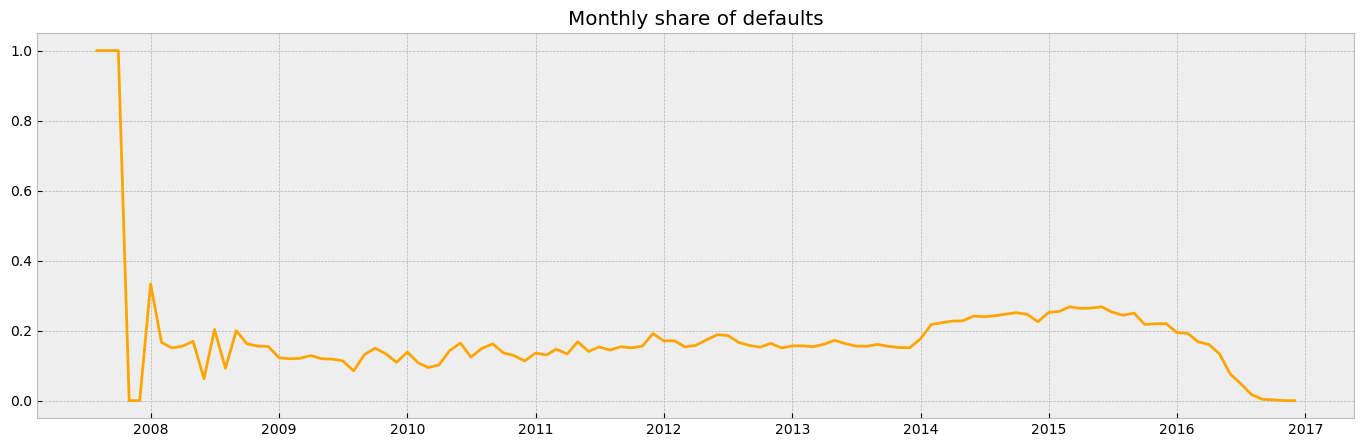

In [7]:
fig = plt.figure()
fig.set_size_inches(17,5)

plt.plot(X.groupby('issue_d')[target].mean(), linewidth=2, color="orange")

plt.title('Monthly share of defaults')

plt.show()

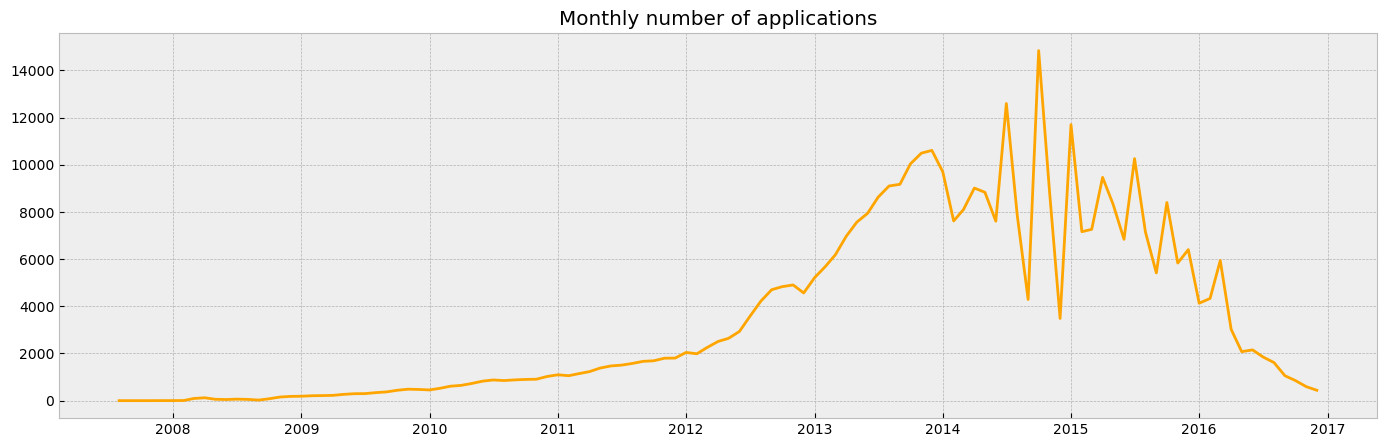

In [8]:
fig = plt.figure()
fig.set_size_inches(17,5)

plt.plot(X.groupby('issue_d')[target].count(), linewidth=2, color="orange")

plt.title('Monthly number of applications')

plt.show()

### Filter only valid years

Let's drop some early dates since the data is unstable there

In [9]:
idx = ((X['issue_d'] >= '2012-01-01') & (X['issue_d'] < '2016-01-01'))

X = X.loc[idx]

X = X.fillna(0)

# Models training and interpretability

## Final preparations

### Filter only needed columns

In [10]:
columns_to_remove = [target]
columns_to_remove += [col for col in X.columns if X[col].dtype in ['O', 'datetime64[ns]']]
columns_to_remove += [col for col in X.columns if 'zip_code' in col]
columns_to_remove += [col for col in X.columns if X[col].dtype == 'uint8']

feature_columns = [col for col in X.columns if col not in columns_to_remove]

len(feature_columns)

13

### Train-test split

We can do a split by time or by applications

In [11]:
last_train_date = '2014-01-01'

idx_train = (X['issue_d'] < last_train_date)

X_train = X.loc[idx_train, feature_columns].copy()
y_train = X.loc[idx_train, target].copy()

X_test = X.loc[~idx_train, feature_columns].copy()
y_test = X.loc[~idx_train, target].copy()

print(X_train.shape)
print(X_test.shape)

(138766, 13)
(197011, 13)


In [12]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X[feature_columns], X[target], test_size=0.3, random_state=42, stratify=X[target])

# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

## Logistic regression

### Fit

In [15]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()

model_lr.fit(X_train, y_train)

forecast_lr = model_lr.predict_proba(X_test)[:,1]

print('AUC score: {:.2f}'.format(roc_auc_score(y_test, forecast_lr)))

AUC score: 0.65


### Regression coefficients

In [16]:
coefs = pd.DataFrame(
    model_lr.coef_[0, :],
    columns=['Coefficients'], index=feature_columns
)

coefs['Coefficients_abs'] = np.abs(coefs['Coefficients'])

coefs = coefs.sort_values(by='Coefficients_abs', ascending=False)
coefs = coefs.reset_index()

coefs.head()

,index,Coefficients,Coefficients_abs
0,int_rate,0.152824,0.152824
1,term,-0.088939,0.088939
2,dti,0.017105,0.017105
3,total_acc,-0.013995,0.013995
4,installment,-0.012355,0.012355


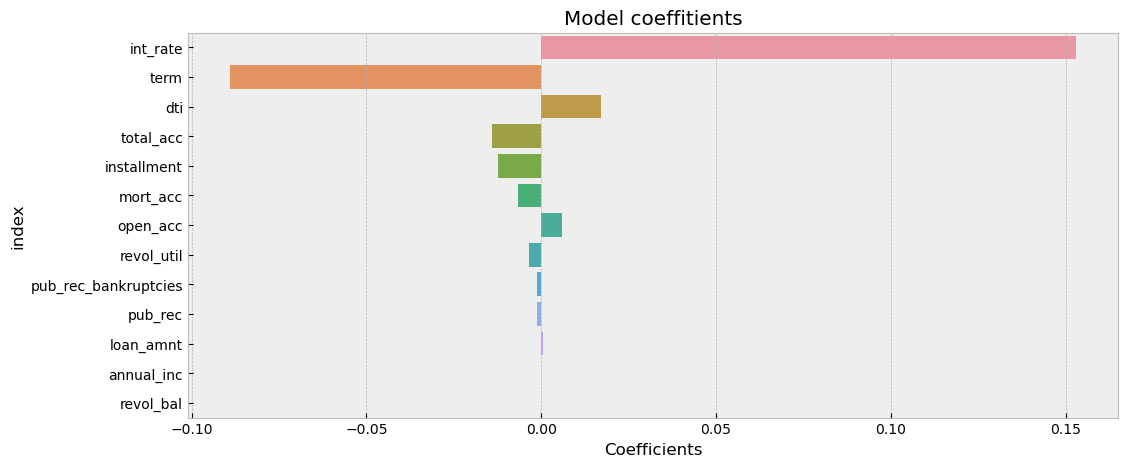

In [17]:
plt.figure(figsize=(12,5))
plt.title('Model coeffitients')
sns.barplot(x='Coefficients', y='index', data=coefs.iloc[:20, :])
plt.show()

## GAMs

https://pygam.readthedocs.io/en/latest/notebooks/tour_of_pygam.html#Introduction

In [21]:
#!pip install pygam 

In [24]:
from pygam import LogisticGAM, s, f

gam = LogisticGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12)).fit(X_train, y_train)

forecast_gam = gam.predict_proba(X_test.values)
forecast_gam[np.isnan(forecast_gam)] = 0.5

print('AUC score: {:.2f}'.format(roc_auc_score(y_test, forecast_gam)))

did not converge
AUC score: 0.70


In [25]:
gam.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                    113.3173
Link Function:                        LogitLink Log Likelihood:                                 -55788.814
Number of Samples:                       138766 AIC:                                           111804.2627
                                                AICc:                                          111804.4528
                                                UBRE:                                               2.8064
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.0841
Feature Function                  Lam

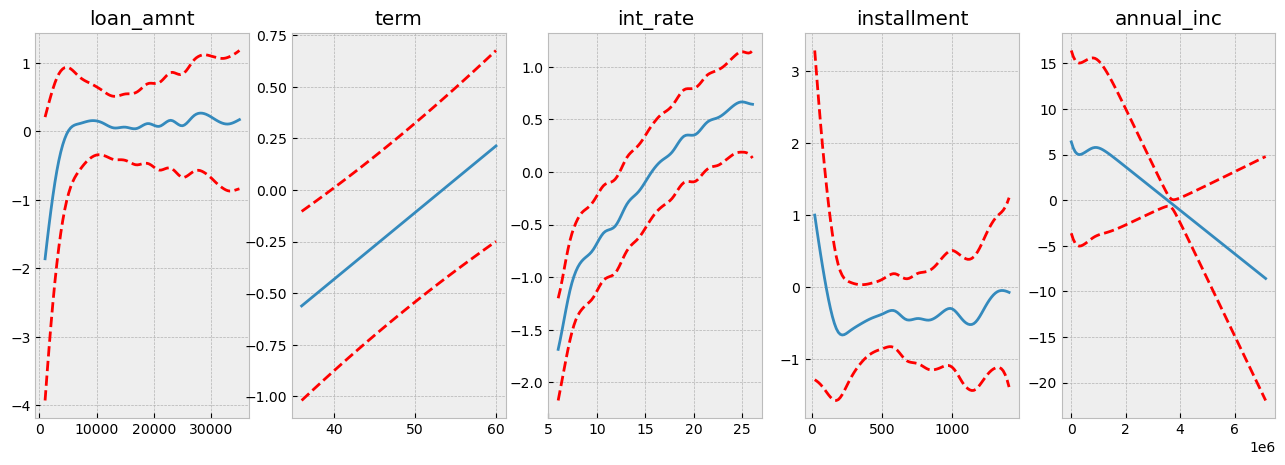

In [27]:
fig, axs = plt.subplots(1,5, figsize=(16,5));

titles = X_train.columns

for i, ax in enumerate(axs):
    
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, width=.95)

    ax.plot(XX[:, i], pdep)
    ax.plot(XX[:, i], confi, c='r', ls='--')
    ax.set_title(titles[i]);

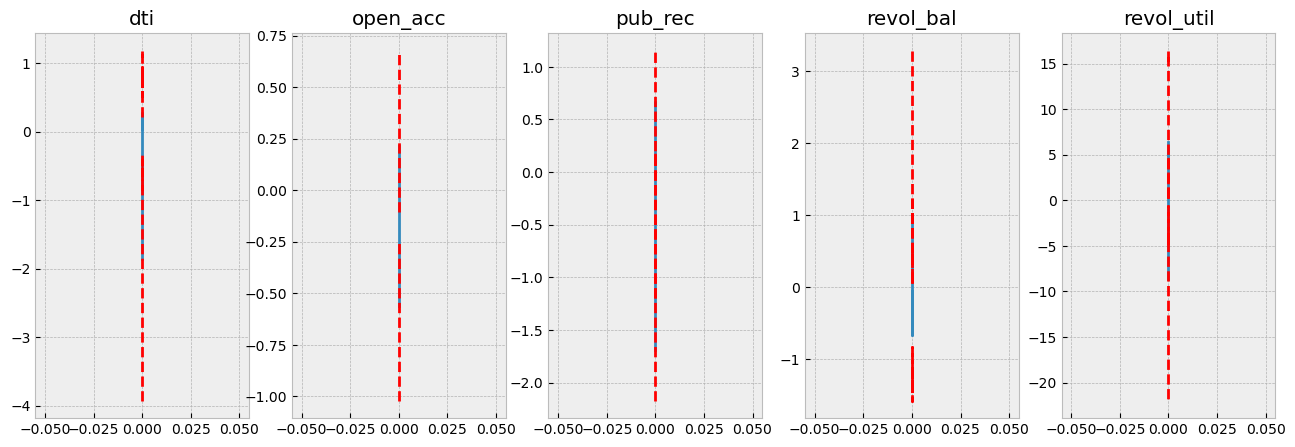

In [28]:
fig, axs = plt.subplots(1,5, figsize=(16,5));

titles = X_train.columns

for i, ax in enumerate(axs):
    
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, width=.95)

    ax.plot(XX[:, i+5], pdep)
    ax.plot(XX[:, i+5], confi, c='r', ls='--')
    ax.set_title(titles[i+5]);

## Decision tree

### Fit

In [39]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(max_depth=4, min_samples_leaf=1000)
model_tree.fit(X_train, y_train)

forecast_tree = model_tree.predict_proba(X_test)[:,1]

print('AUC score: {:.2f}'.format(roc_auc_score(y_test, forecast_tree)))

AUC score: 0.68


### Rules from a tree

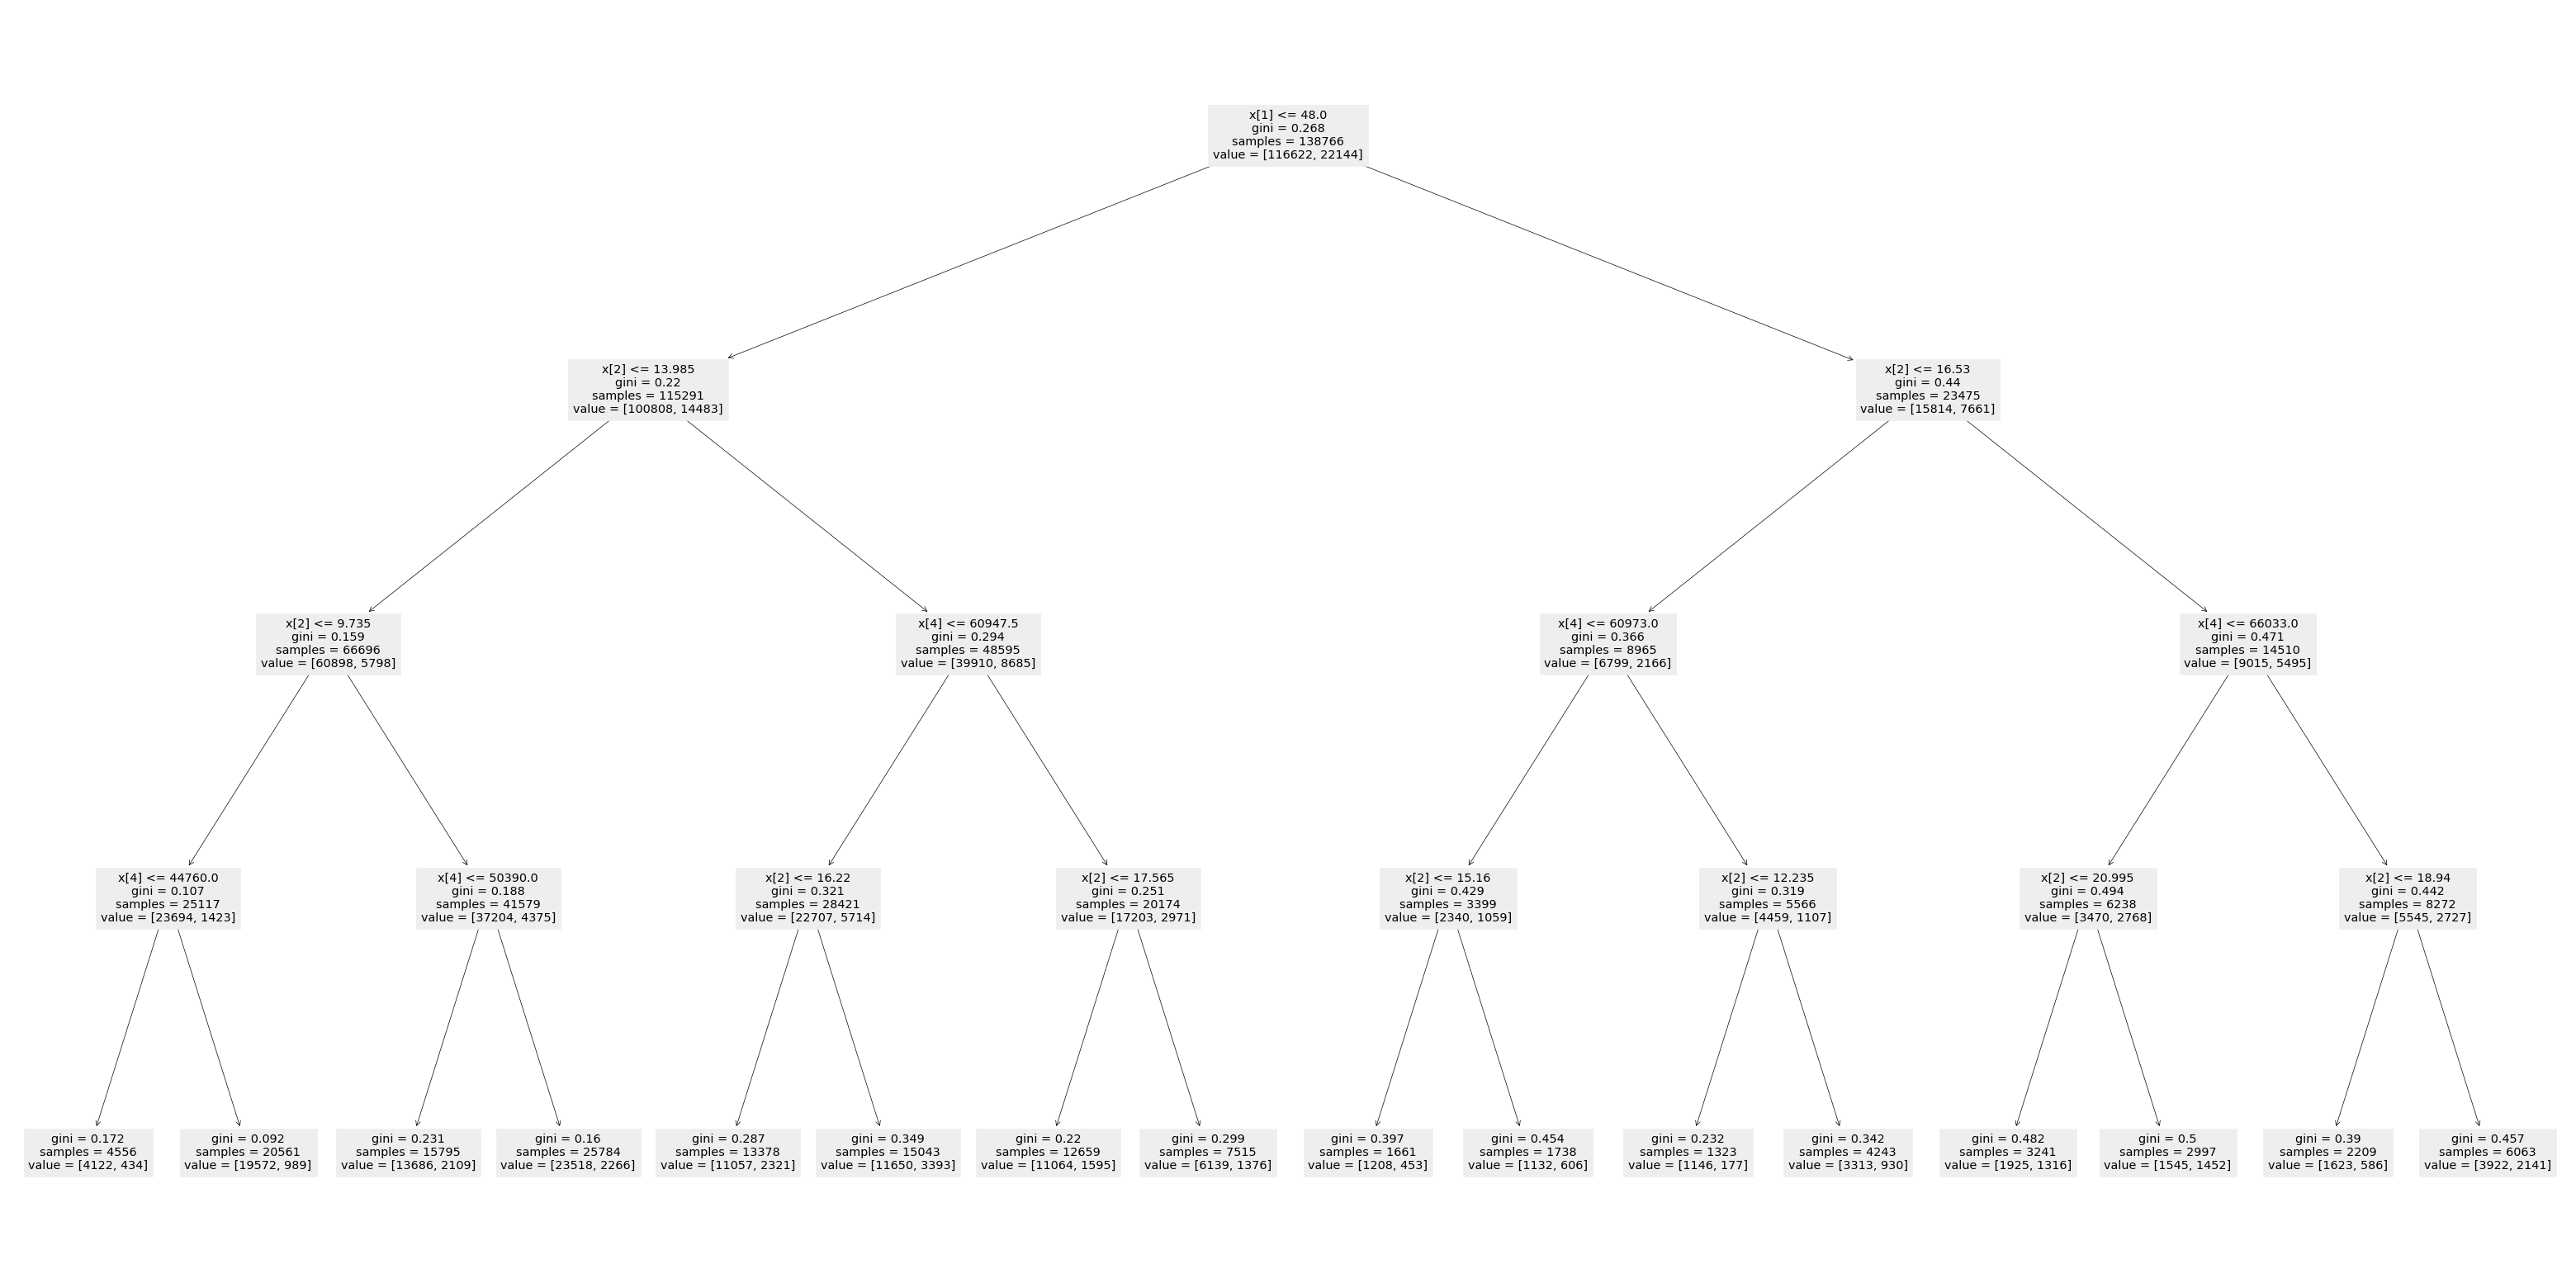

In [44]:
from sklearn.tree import plot_tree
from sklearn import tree

plt.figure(figsize=(18,8))

tree.plot_tree(model_tree)
plt.show()

## Gradient boosting

### Fit

In [83]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42, stratify=y_train)

lgbtrain = lgb.Dataset(data=X_tr, label=y_tr)
lgbtest = lgb.Dataset(data=X_val, label=y_val)

lgb_params = {
    'n_estimators': 2000,
    'objective': 'binary',
    'metric': 'auc',
    'learning_rate': 0.01,
    'verbosity': -1,
    'feature_fraction': 0.75,
   'bagging_fraction': 0.75, 
   'bagging_freq': 1,
    
    'max_depth': 5,
    
    'nthread': -1,
   'bagging_seed': 42, 
  }

model_lgb = lgb.train(params=lgb_params,
                      train_set=lgbtrain, valid_sets=lgbtest)

forecast_boosting = model_lgb.predict(X_test)
tr_preds = model_lgb.predict(X_tr)
print('AUC train score: {:.2f}'.format(roc_auc_score(y_tr, tr_preds)))
print('AUC oos score: {:.2f}'.format(roc_auc_score(y_test, forecast_boosting)))

AUC train score: 0.76
AUC oos score: 0.70


### Variable importance

In [84]:
variable_importance = pd.DataFrame(sorted(zip(model_lgb.feature_importance(importance_type='gain'), feature_columns), reverse=True))

variable_importance.columns = ['gain', 'feature']

variable_importance.head(10)

,gain,feature
0,172913.934988,int_rate
1,79299.332733,term
2,62148.952444,annual_inc
3,40016.192747,dti
4,36993.948715,revol_bal
5,35002.644491,revol_util
6,30985.852277,installment
7,29190.182030,loan_amnt
8,23627.637552,total_acc
9,19820.080547,open_acc


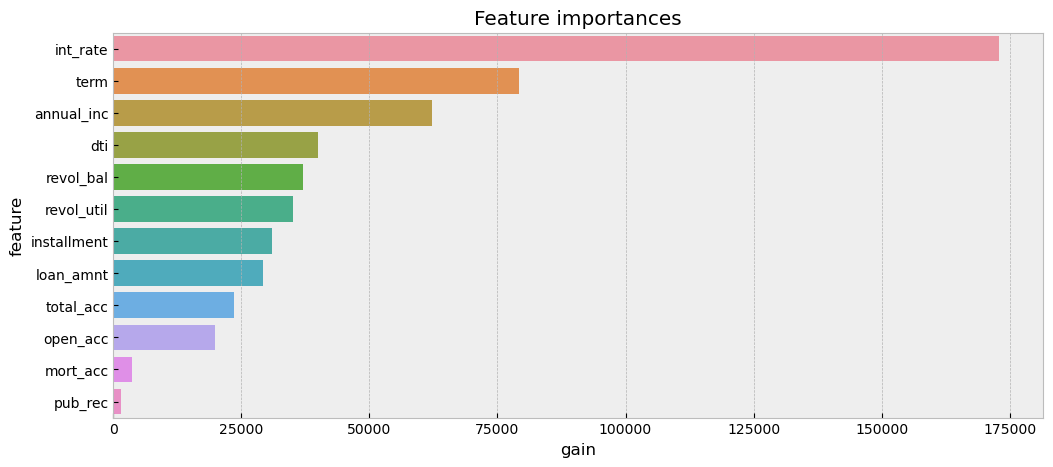

In [85]:
plt.figure(figsize=(12,5))
plt.title('Feature importances')
sns.barplot(x='gain', y='feature', data=variable_importance.iloc[:12, :])
plt.show()

### SHAP values

https://habr.com/ru/articles/428213/

In [89]:
import shap

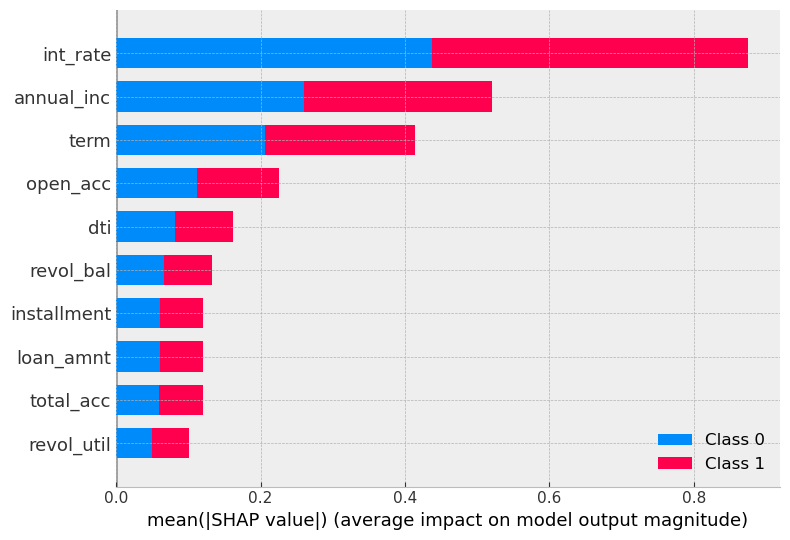

In [90]:
import shap

size_for_shap = 10**4
x_sample = X_train.sample(size_for_shap)

shap_values = shap.TreeExplainer(model_lgb).shap_values(x_sample)

shap.summary_plot(shap_values, X_train, plot_type="bar", max_display=10)

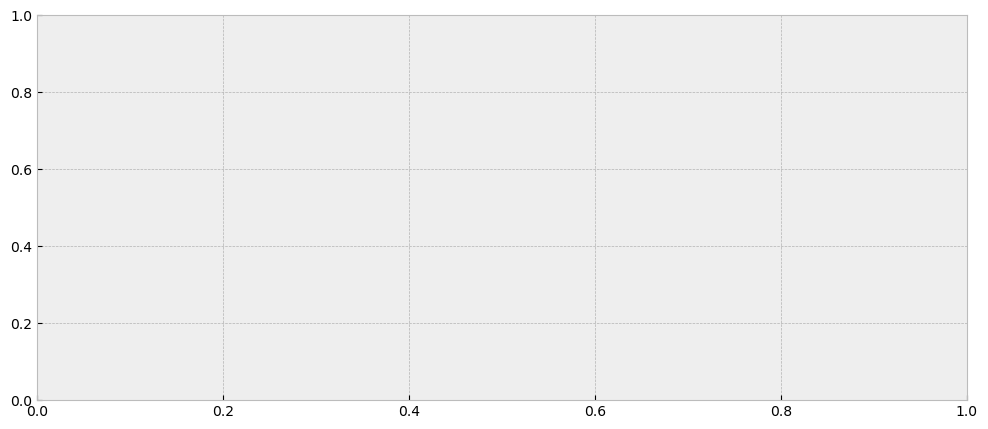

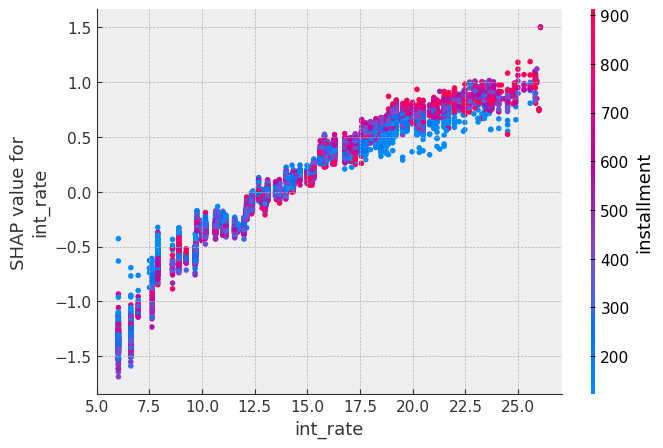

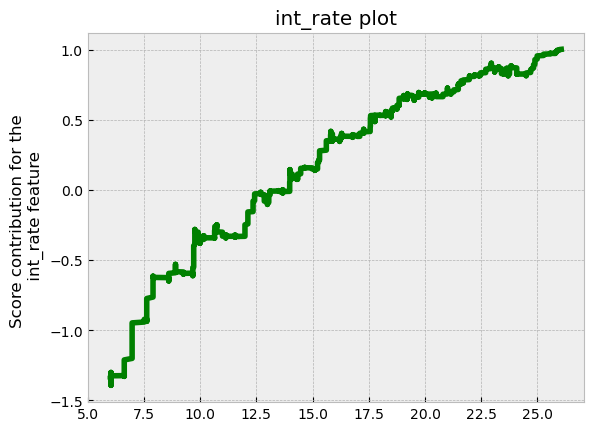

In [102]:
from scipy.ndimage.filters import gaussian_filter1d

variable_selected = 'int_rate'
idx = np.where(np.array(x_sample.columns) == variable_selected)[0][0]

aux_dt = pd.DataFrame({
    'variable_value': x_sample[variable_selected].values,
    'Shap': shap_values[1][:, idx]
})

aux_dt = aux_dt.sort_values(by='variable_value')

# Найдем ysmoothed с помощью gaussian_filter1d для Shap с sigma 10
ysmoothed = gaussian_filter1d(aux_dt['Shap'], sigma=10)

fig, ax = plt.subplots(figsize=(12,5))

# Построим shap.dependence_plot
shap.dependence_plot(variable_selected,
                     shap_values[1],
                     features=x_sample,
                     display_features=x_sample,
                     feature_names=x_sample.columns
                     )

plt.plot(aux_dt['variable_value'], ysmoothed, 'g-', linewidth=4)

plt.title("{} plot".format(variable_selected))
plt.ylabel("Score contribution for the \n {} feature".format(variable_selected))

plt.show()

# Model performance

In [103]:
d = {
    'Logistic regression': forecast_lr,
    'Decision tree': forecast_tree,
    'Boosting': forecast_boosting,
}

## Confusion matrix

In [104]:
d['Logistic regression']

array([0.09556378, 0.12855738, 0.12043439, ..., 0.09343283, 0.07162611,
       0.11257733])

In [105]:
from sklearn.metrics import confusion_matrix

for model in d.keys():
    
    print('\n',model)
    
    y_pred = d[model] > 0.5
    print(confusion_matrix(y_test, y_pred))
    
    # get confusion matrix for every model with threshold = 0.5


 Logistic regression
[[146907   2886]
 [ 45927   1291]]

 Decision tree
[[149793      0]
 [ 47218      0]]

 Boosting
[[147914   1879]
 [ 44675   2543]]


## Precision, recall, f1-score for 0.5 threshold

In [107]:
from sklearn.metrics import classification_report

for model in d.keys():

    print('\n',model)
    
    target_names = ['class 0', 'class 1']
    print(classification_report(y_test, np.where(d[model] > 0.5, 1, 0), target_names=target_names))


 Logistic regression
              precision    recall  f1-score   support

     class 0       0.76      0.98      0.86    149793
     class 1       0.31      0.03      0.05     47218

    accuracy                           0.75    197011
   macro avg       0.54      0.50      0.45    197011
weighted avg       0.65      0.75      0.66    197011


 Decision tree
              precision    recall  f1-score   support

     class 0       0.76      1.00      0.86    149793
     class 1       0.00      0.00      0.00     47218

    accuracy                           0.76    197011
   macro avg       0.38      0.50      0.43    197011
weighted avg       0.58      0.76      0.66    197011


 Boosting
              precision    recall  f1-score   support

     class 0       0.77      0.99      0.86    149793
     class 1       0.58      0.05      0.10     47218

    accuracy                           0.76    197011
   macro avg       0.67      0.52      0.48    197011
weighted avg       0.72  

## ROC and PR curves

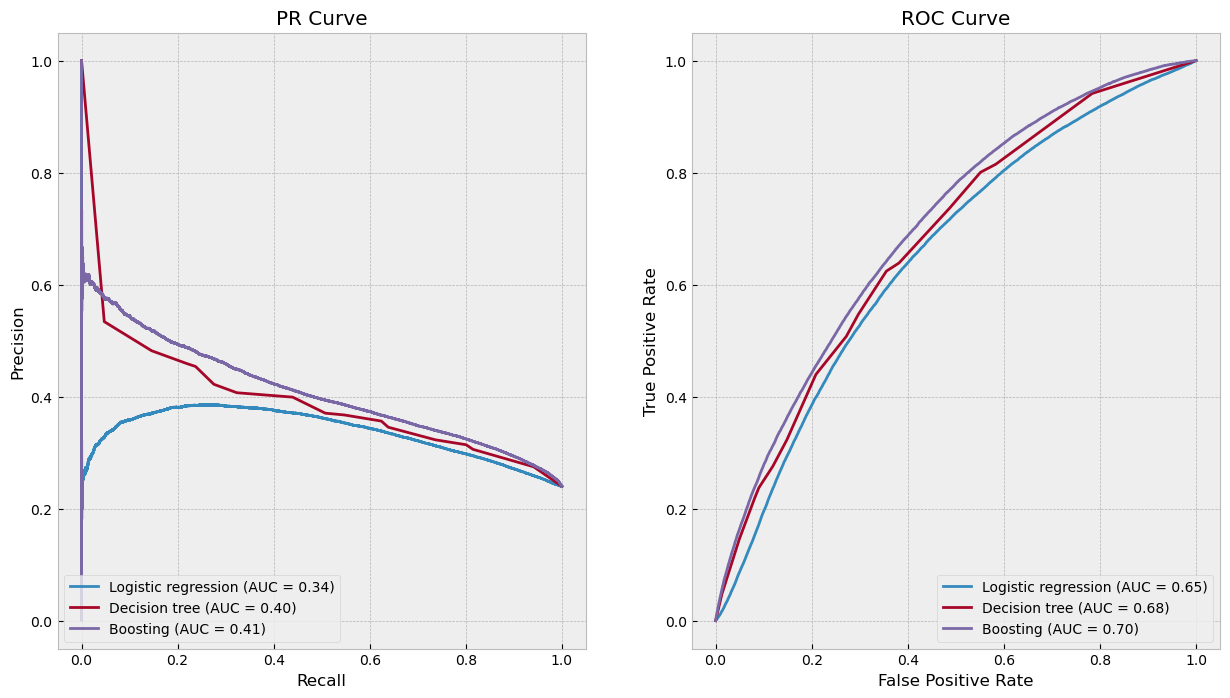

In [109]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlim([-0.05,1.05])
ax1.set_ylim([-0.05,1.05])
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('PR Curve')

ax2 = fig.add_subplot(1,2,2)
ax2.set_xlim([-0.05,1.05])
ax2.set_ylim([-0.05,1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve')
    
for model in d.keys():
    
    scores = d[model]
    
    # plot precision-recall and ROC AUC curves
    
    # Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, scores)
    pr_auc = auc(recall, precision)
    ax1.plot(recall, precision, label=f"{model} (AUC = {pr_auc:.2f})")

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, scores)
    roc_auc = auc(fpr, tpr)
    ax2.plot(fpr, tpr, label=f"{model} (AUC = {roc_auc:.2f})")

ax1.legend(loc='lower left')    
ax2.legend(loc='lower right')
                                          
plt.show()

## Precision, recall, f1-score curves

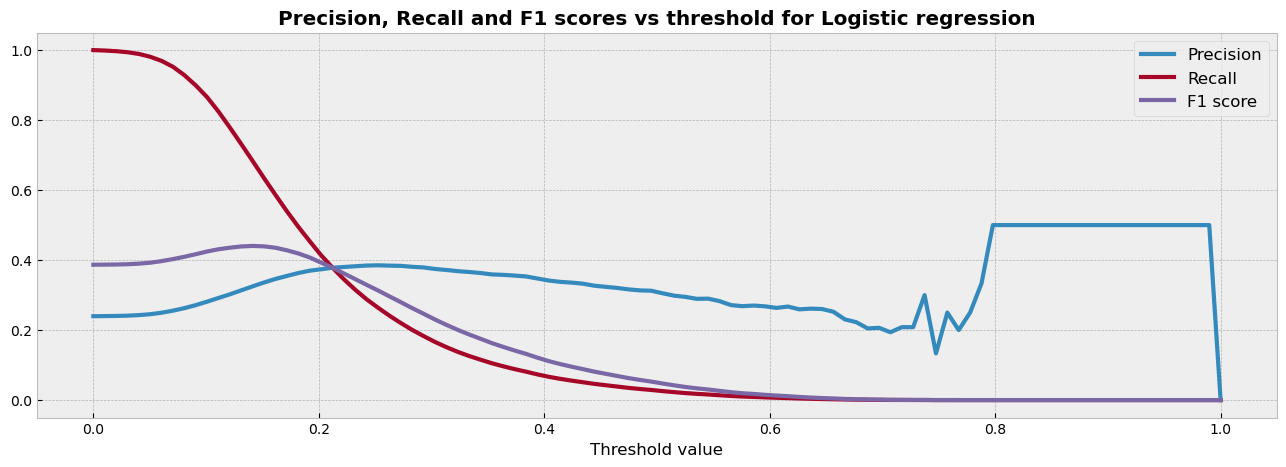

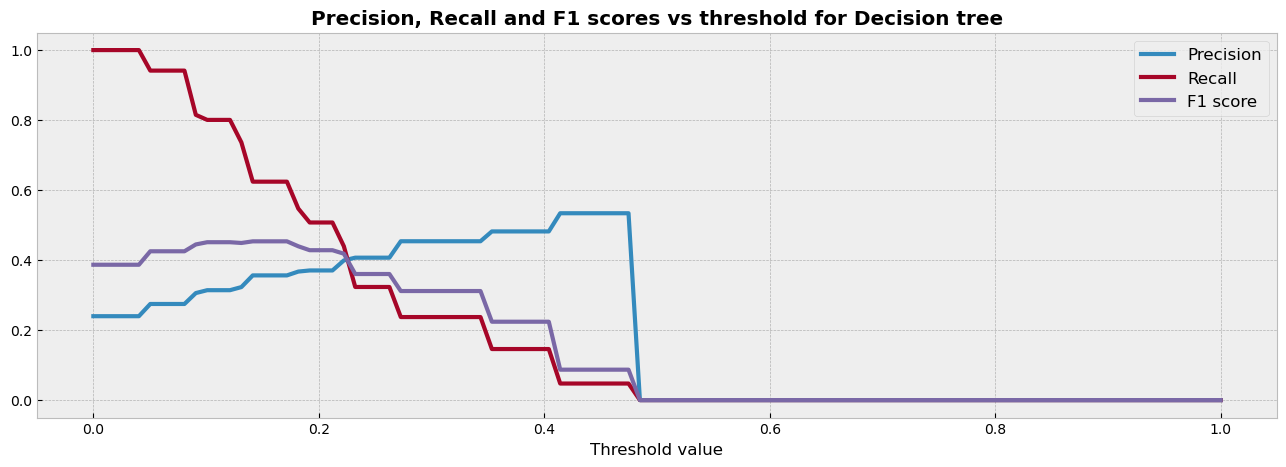

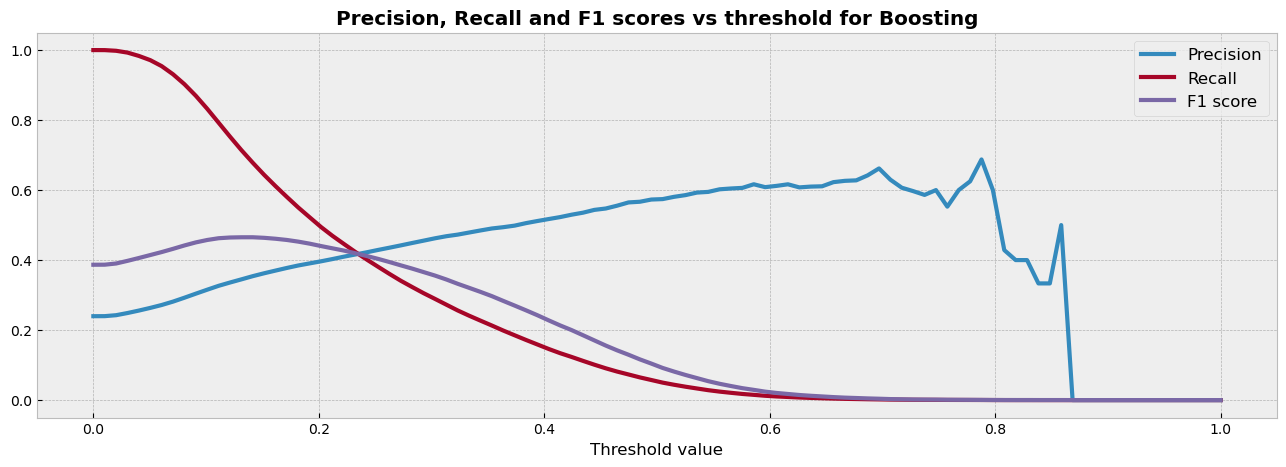

In [112]:
from sklearn.metrics import precision_score, recall_score, f1_score

for model in d.keys():
    
    scores = d[model]

    tr = np.linspace(0, 1, 100)

    p = np.zeros_like(tr)
    r = np.zeros_like(tr)
    f = np.zeros_like(tr)

    for k, x in enumerate(tr):
#         plot precision, recall and f1 scores for every threshold  for every model
        preds = (scores > x).astype(int)
        p[k] = precision_score(y_test, preds)
        r[k] = recall_score(y_test, preds)
        f[k] = f1_score(y_test, preds)
        
        
    fig = plt.figure(figsize=(16, 5))

    plt.plot(tr, p, linewidth=3)
    plt.plot(tr, r, linewidth=3)
    plt.plot(tr, f, linewidth=3)

    plt.title("Precision, Recall and F1 scores vs threshold for {}".format(model), weight="bold")

    plt.xlabel("Threshold value")

    plt.legend(['Precision', 'Recall', 'F1 score'], fontsize=12)

    plt.show()

## Score in time

In [ ]:
if len(group_data) > 0:
        auc_score = roc_auc_score(group_data[target], group_data['predictions_boosting'])
        auc_score_in_time = pd.concat([auc_score_in_time, pd.DataFrame({'Date': group_data.index, 'AUC': auc_score})], ignore_index=True)
    else:
        auc_score_in_time = pd.concat([auc_score_in_time, pd.DataFrame({'Date': [i], 'AUC': np.nan})], ignore_index=True)

In [165]:
X_sorted['issue_d'].unique()

<PeriodArray>
['2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07',
 '2012-08', '2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-02',
 '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09',
 '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04',
 '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11',
 '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
 '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12']
Length: 48, dtype: period[M]

In [187]:
X['predictions_boosting'] = model_lgb.predict(X[feature_columns])

# calculate score values in dynamics
# X['issue_d'] = pd.to_datetime(X['issue_d']).dt.to_period('M')
X_sorted = X.sort_values(by='issue_d')

auc_score_in_time = pd.DataFrame(columns=['Date', 'AUC'])
for i in X_sorted['issue_d'].unique():
    group_data = X_sorted.loc[X_sorted['issue_d'] == i]
    if len(group_data) > 0:
        auc_score = roc_auc_score(group_data[target], group_data['predictions_boosting'])
        auc_score_in_time = pd.concat([auc_score_in_time, pd.DataFrame({'Date': [i], 'AUC': auc_score})], ignore_index=True)
    else:
        auc_score_in_time = pd.concat([auc_score_in_time, pd.DataFrame({'Date': [i], 'AUC': 0})], ignore_index=True)

In [201]:
auc_score_in_time_graph = auc_score_in_time.copy()
auc_score_in_time_graph['Date'] = auc_score_in_time_graph['Date'].astype('datetime64')
auc_score_in_time_graph = auc_score_in_time_graph.set_index('Date')

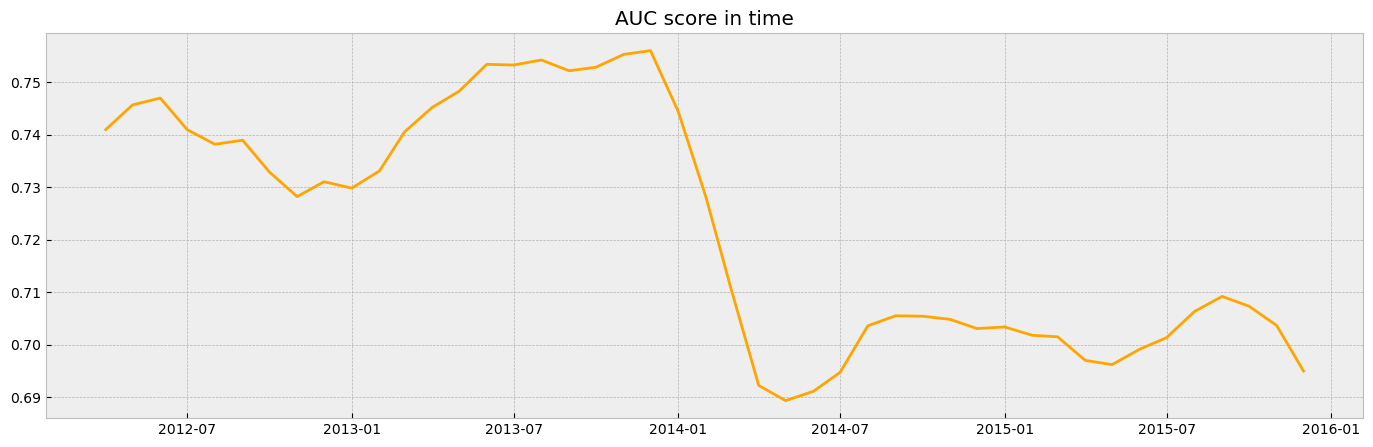

In [202]:
fig = plt.figure()
fig.set_size_inches(17, 5)

plt.plot(auc_score_in_time_graph['AUC'].rolling(4).mean(), linewidth=2, color="orange")

plt.title('AUC score in time')

plt.show()

## Score distribution and optimal threshold

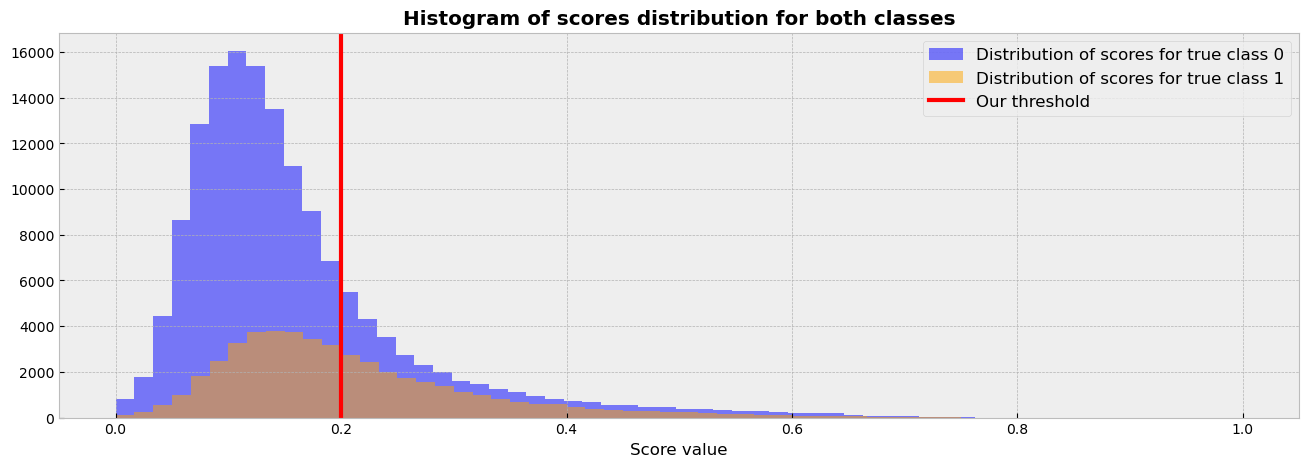

In [207]:
# 'Boosting' 'Logistic regression'
scores = d['Logistic regression']

fig = plt.figure(figsize=(16, 5))

# plot distribution of scores for class 0 and for class 1
plt.hist(scores[y_test == 0], bins=60, alpha=0.5, color='blue', label='Distribution of scores for true class 0')
plt.hist(scores[y_test == 1], bins=60, alpha=0.5, color='orange', label='Distribution of scores for true class 1')

plt.axvline(0.2, color='red', linewidth=3, label='Our threshold')

plt.title("Histogram of scores distribution for both classes", weight="bold")

plt.xlabel("Score value")

plt.legend([
    'Disctibution of scores for true class 0',
    'Disctibution of scores for true class 1', 
    'Our threshold'], 
    fontsize=12
)

plt.legend(fontsize=12)

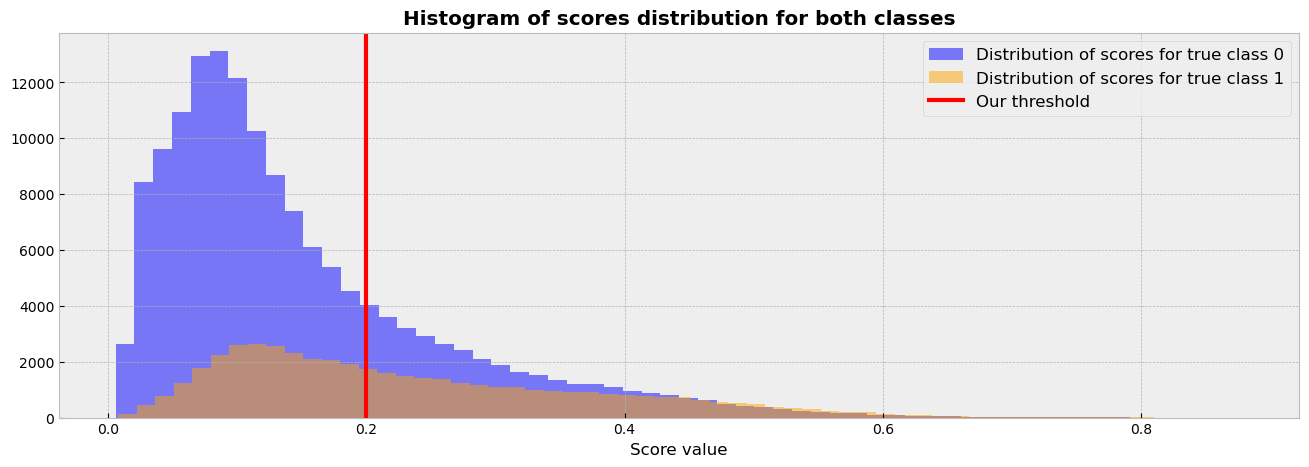

In [208]:
scores = d['Boosting']

fig = plt.figure(figsize=(16, 5))

# plot distribution of scores for class 0 and for class 1
plt.hist(scores[y_test == 0], bins=60, alpha=0.5, color='blue', label='Distribution of scores for true class 0')
plt.hist(scores[y_test == 1], bins=60, alpha=0.5, color='orange', label='Distribution of scores for true class 1')

plt.axvline(0.2, color='red', linewidth=3, label='Our threshold')

plt.title("Histogram of scores distribution for both classes", weight="bold")

plt.xlabel("Score value")

plt.legend([
    'Disctibution of scores for true class 0',
    'Disctibution of scores for true class 1', 
    'Our threshold'], 
    fontsize=12
)

plt.legend(fontsize=12)

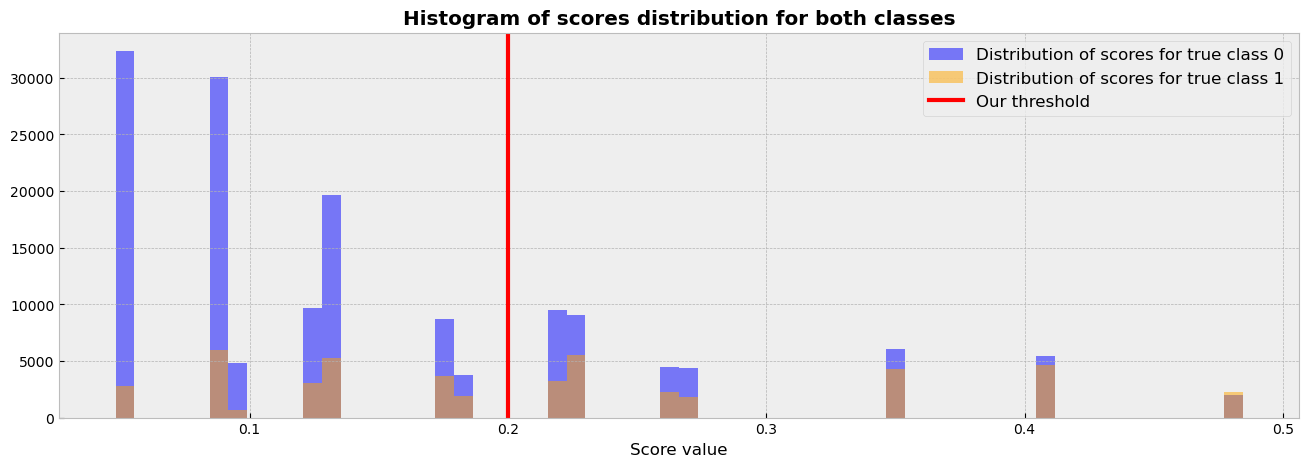

In [209]:
scores = d['Decision tree']

fig = plt.figure(figsize=(16, 5))

# plot distribution of scores for class 0 and for class 1
plt.hist(scores[y_test == 0], bins=60, alpha=0.5, color='blue', label='Distribution of scores for true class 0')
plt.hist(scores[y_test == 1], bins=60, alpha=0.5, color='orange', label='Distribution of scores for true class 1')

plt.axvline(0.2, color='red', linewidth=3, label='Our threshold')

plt.title("Histogram of scores distribution for both classes", weight="bold")

plt.xlabel("Score value")

plt.legend([
    'Disctibution of scores for true class 0',
    'Disctibution of scores for true class 1', 
    'Our threshold'], 
    fontsize=12
)

plt.legend(fontsize=12)

## Probability calibration

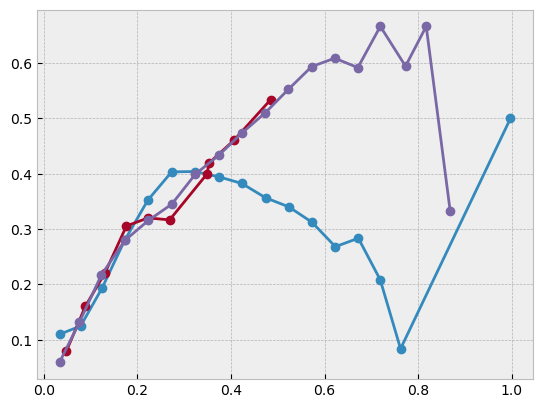

<Figure size 1200x500 with 0 Axes>

In [211]:
from sklearn.calibration import calibration_curve

# Plot calibration curves for every model
for model, scores in d.items():
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test, scores, n_bins=20)
    plt.plot(mean_predicted_value, fraction_of_positives, marker='o', label=model)

fig = plt.figure(figsize=(12, 5))

# plt.legend(d.keys())

# plt.title("Calibration curves for different classifiers", weight="bold")

# plt.xlabel("Mean predicted value")
# plt.ylabel("Fraction of positives")

# plt.show()

## Benefit curve

Define a function for constant values

In [216]:
def benefit_plot(model, X_train, y_train, X_test, y_test, profit, loss):
                 
    plt.figure(figsize=(10,8))

    colors = ['olivedrab','deepskyblue',  'salmon']
    
    max_val = []
    for it, i in enumerate(['train', 'test']):
        
        if i == 'train':
            X = X_train
            y = y_train
            
        elif i == 'test':
            X = X_test
            y = y_test

        benefit = []    
        c_acceptance_rate = []
        
        y_hat = model.predict_proba(X)[:, 1]
        
        thr = np.linspace(0, 1, 50)
        
        for t in thr:
            y_pred = (y_hat >= t).astype(int)
            tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
            acceptance_rate = (tp + fp) / (tp + fp + tn + fn)
            total_profit = tp * profit - fp * loss
            
            benefit.append(total_profit)
            c_acceptance_rate.append(acceptance_rate)

        print('Model',i, 'Max Benefit: ', np.max(benefit)) 
        
        plt.plot(c_acceptance_rate, benefit, label = i, color = colors[it], linewidth=2)  
        plt.plot(c_acceptance_rate[np.argmax(benefit)], np.max(benefit), color = colors[it], marker='*', markersize=10)
         

    plt.xlabel('Acceptance rate')
    plt.ylabel('Benefit')
    plt.title('Benefit curve for old model')
    plt.legend(bbox_to_anchor=(1, 1))
    _ = plt.legend(loc= 0, prop= {'size': 16})


Model train Max Benefit:  0.0
Model test Max Benefit:  1975.253182356278


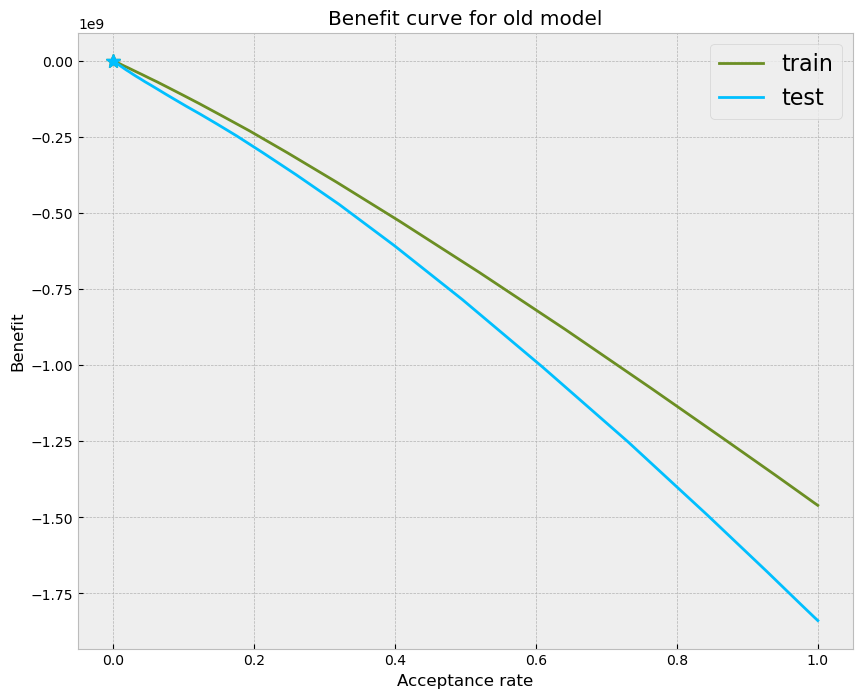

In [217]:
S = X['loan_amnt'].mean() # amount of loan
r = X['int_rate'].mean() / 100 # interest rate

lgd = 0.90 # losses in case of default

profit = r * S # profit if loan is returned
loss = lgd * S # loss if loan is gone

benefit_plot(model_lr, X_train, y_train, X_test, y_test, profit, loss)

# Additional topics

## AutoML

- https://pycaret.org/guide/
- https://github.com/ray-project/tune-sklearn

Install packages

In [222]:
# !pip install pycaret
# !pip install tune-sklearn ray[tune]

Do a setup

In [220]:
import pycaret
from pycaret.classification import *

clf = setup(
    
    data=X.loc[idx_train, feature_columns + [target]].copy(),  
    test_data=X.loc[~idx_train, feature_columns + [target]].copy(),
    target=target,
    
    preprocess=False,
    
    fold_strategy='stratifiedkfold', 
    fold=5,
    
    session_id=123, 
    log_experiment=True, 
    experiment_name='juice1'
)

ModuleNotFoundError: No module named 'pycaret'

Fit logistic regression

In [301]:
lr = create_model(
    estimator='lr', 
    fold=4
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8372,0.6606,0.0146,0.2967,0.0279,0.0131,0.0333
1,0.8397,0.5906,0.0020,0.2391,0.0039,0.0013,0.0079
2,0.8359,0.6558,0.0202,0.2940,0.0379,0.0177,0.0387
3,0.8376,0.6636,0.0175,0.3322,0.0333,0.0176,0.0434
Mean,0.8376,0.6426,0.0136,0.2905,0.0257,0.0124,0.0308
SD,0.0014,0.0302,0.0070,0.0333,0.0131,0.0067,0.0137


In [304]:
lr.C

1.0

Tune logistic regression

In [302]:
tuned_lr = tune_model(
    estimator=lr, 
    optimize='AUC', 
    n_iter=10,
    search_library='tune-sklearn'
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6380,0.6858,0.6419,0.2515,0.3614,0.1714,0.2081
1,0.6412,0.6890,0.6365,0.2525,0.3615,0.1724,0.2081
2,0.6384,0.6785,0.6247,0.2484,0.3554,0.1647,0.1986
3,0.6432,0.6820,0.6261,0.2516,0.3590,0.1700,0.2040
4,0.6416,0.6946,0.6434,0.2540,0.3642,0.1756,0.2124
Mean,0.6405,0.6860,0.6345,0.2516,0.3603,0.1708,0.2062
SD,0.0020,0.0056,0.0078,0.0018,0.0029,0.0036,0.0047


In [303]:
tuned_lr.C

5.56

Check and visualize performance 

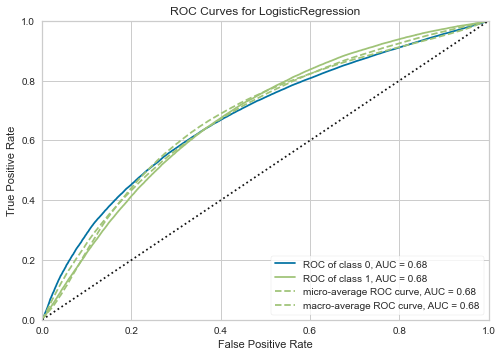

In [307]:
plot_model(tuned_lr)

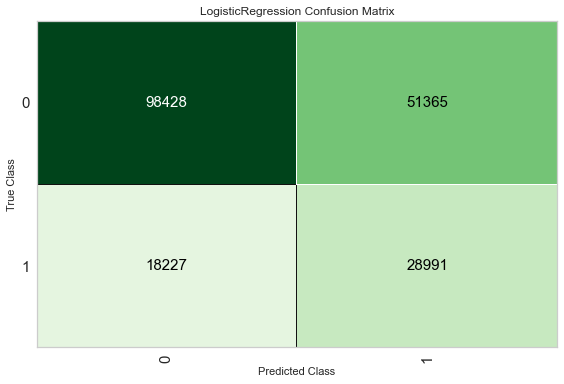

In [308]:
plot_model(tuned_lr, plot = 'confusion_matrix')

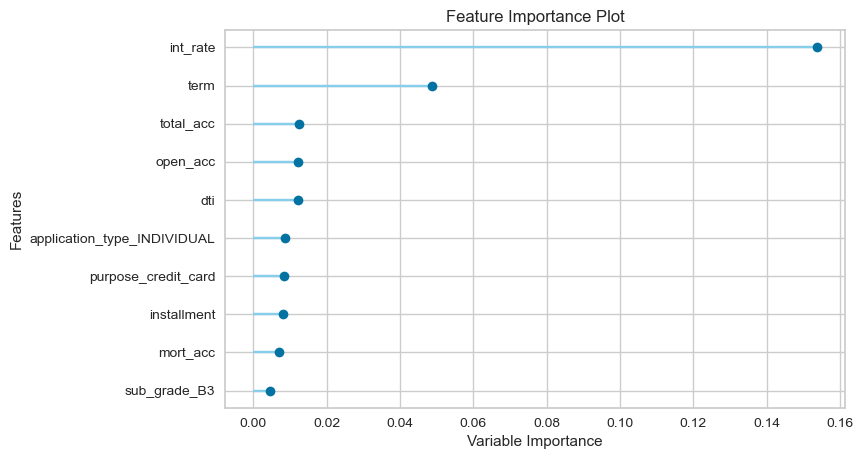

In [309]:
plot_model(tuned_lr, plot = 'feature')

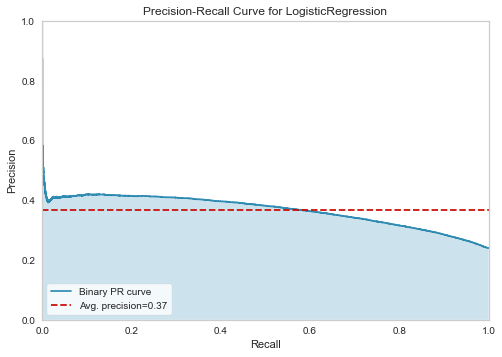

In [310]:
plot_model(tuned_lr, plot = 'pr')

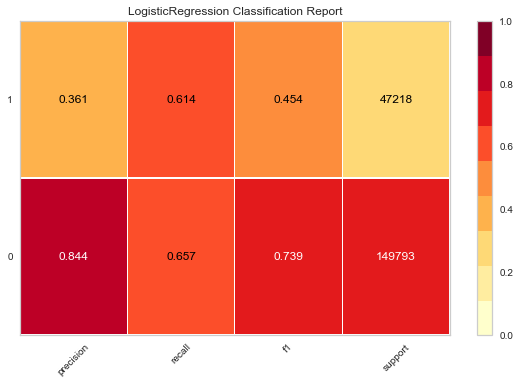

In [311]:
plot_model(tuned_lr, plot = 'class_report')

Here you can try using some ensembles

In [ ]:
ensembled_models = compare_models(whitelist = models(type='ensemble').index.tolist(), fold = 3)

In [ ]:
blender = blend_models(estimator_list = [boosted_dt, bagged_dt, tuned_rf], method = 'soft')

In [ ]:
stacker = stack_models(estimator_list = [boosted_dt,bagged_dt,tuned_rf], meta_model=rf)

## More Interpretability

- Good overview: https://christophm.github.io/interpretable-ml-book/interpretability.html
- Nice library: https://github.com/csinva/imodels

In [313]:
# !pip install imodels

In [360]:
from imodels import RuleFitClassifier

model_rulefit = RuleFitClassifier(
    tree_size=4, 
    sample_fract='default', 
    max_rules=10, 
#     include_linear=True, 
    cv=3, 
    random_state=42
)

model_rulefit.fit(X_train, y_train)   # fit model

print(model_rulefit) # print the rule-based model

RuleFitClassifier(alphas=None, cv=3, exp_rand_tree_size=True,
                  include_linear=True, lin_standardise=True,
                  lin_trim_quantile=0.025, max_rules=10, memory_par=0.01,
                  random_state=42, sample_fract='default', tree_generator=None,
                  tree_size=4)


In [361]:
model_rulefit.visualize()

,rule,coef
1,feature_1,-0.037


In [363]:
model_rulefit.get_rules()

,rule,type,coef,support,importance
0,feature_0,linear,0.000000,1,0.000000
1,feature_1,linear,-0.037428,1,0.336762
2,feature_2,linear,0.000000,1,0.000000
3,feature_3,linear,0.000000,1,0.000000
4,feature_4,linear,0.000000,1,0.000000
...,...,...,...,...,...
63,feature_63,linear,0.000000,1,0.000000
64,feature_64,linear,0.000000,1,0.000000
65,feature_65,linear,0.000000,1,0.000000
66,feature_66,linear,0.000000,1,0.000000


In [355]:
preds_proba = model.predict_proba(X_test) # predicted probabilities: shape is (n_test, n_classes)